### Master's Thesis 
**Problem Statement:** Sentiment Analysis on Women's Clothing Reviews Using KNN and CNN with different Class balancing Techniques

In [88]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant
from matplotlib import pyplot
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import Adam
from itertools import chain
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split

In [83]:
#Function to Remove punctuations
def remove_punctuations(col):
    no_punct = ''
    no_punct = re.sub('['+string.punctuation+']', '', str(col))    
    return no_punct
#Function to Convert text to lower case
def lower_case(tokens): 
    return [w.lower() for w in tokens] 
#Function to Remove stop words
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

In [2]:
# Functions to calculatle recall, precision and F1-Score
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
# Reading e-commerce data
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [4]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
#Selecting required columns
data = data[['Review Text','Recommended IND']]

In [6]:
data.shape

(23486, 2)

In [7]:
#Replacing blank lines in the data with nan
data['Review Text']=data['Review Text'].replace(r'', np.nan)

In [8]:
data.isnull().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [9]:
#Removing null values
data = data.dropna()

In [10]:
data.shape

(22641, 2)

In [33]:
data['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

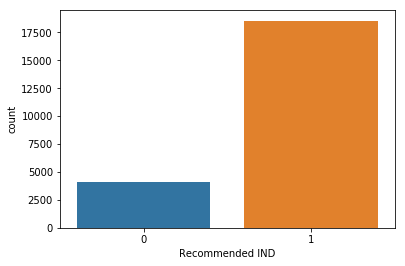

In [12]:
#Plotting response variable
sns.countplot(data['Recommended IND'])

In [15]:
#Calling remove punctuation function to remove the punctuations from the text
data['Text_Clean'] = data['Review Text'].apply(lambda x: remove_punctuations(x))

In [16]:
#Tokenizing the text and converting tokens to lowercase
tokens = [word_tokenize(word) for word in data['Text_Clean']]
lower_tokens = [lower_case(token) for token in tokens]

In [17]:
#Removing stopwords from the tokens
stoplist = stopwords.words('english')
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
data['Text_Clean'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [18]:
data.head()

,Review Text,Recommended IND,Text_Clean,tokens
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store im ...,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...,"[shirt, flattering, due, adjustable, front, ti..."


### Implementing Word Cloud for Analysis

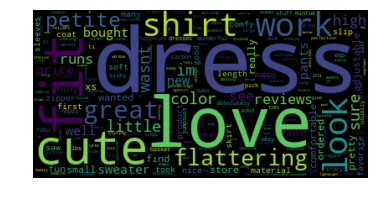

In [19]:
# Word cloud for all the reviews
text = data['tokens']
text = str(text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

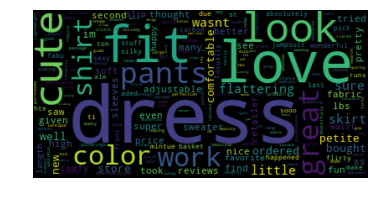

In [20]:
# Word cloud for positive reviews
pos_text = data.loc[data['Recommended IND']==1,'tokens']
pos_text = str(pos_text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(pos_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

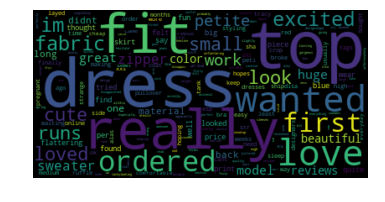

In [21]:
# Word cloud for negative reviews
neg_text = data.loc[data['Recommended IND']==0,'tokens']
neg_text = str(neg_text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(neg_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#Converting dataframe column to list
text = data['Text_Clean'].tolist()
text[:3]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite',
 'high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c']

In [27]:
#Separating target variable
y = data['Recommended IND']

In [40]:
#Reading glove text file
glove = pd.read_table('glove.6B.100d.txt',
                          delimiter=' ',
                          index_col=0,
                          header=None,
                          quoting=csv.QUOTE_NONE)

In [79]:
# Function to create embedding matrix using Glove to apply KNN algorithm
def get_embedding_matrix(corpus_df, embeddings, func, dim=100):
        
    X_knn = np.zeros([len(corpus_df), dim])
    for i,j in zip(range(len(corpus_df)),corpus_df):        
        X_knn[i] = func(embeddings.loc[j])    
        
    return X_knn
    

In [84]:
# Taking mean for the embedding matrix
data_knn = get_embedding_matrix( data['tokens'],glove, np.mean)

In [85]:
data_knn

array([[-0.0675694 ,  0.13907069,  0.3875486 , ..., -0.5627672 ,
        -0.1208256 ,  0.669328  ],
       [ 0.00561489,  0.17152636,  0.3086501 , ..., -0.29076129,
         0.17269139,  0.20645587],
       [-0.2631278 ,  0.23100833,  0.18257274, ..., -0.29205704,
         0.35314625,  0.04658051],
       ...,
       [-0.12903953,  0.19596153,  0.06471863, ..., -0.26513632,
         0.38668368,  0.32357823],
       [-0.0328954 ,  0.30813327,  0.18297839, ..., -0.15993131,
         0.33784195,  0.18532497],
       [-0.20799   ,  0.26319273,  0.20942873, ..., -0.37285182,
        -0.04659227,  0.38724084]])

In [86]:
np.shape(data_knn)

(22641, 100)

In [89]:
#Splitting the dataset into train and test dataset
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data_knn, y, random_state = 42, test_size = 0.2, stratify = y)


### Implementing KNN

In [90]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Declaring empty arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_knn, y_train_knn)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_knn, y_train_knn)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_knn, y_test_knn)

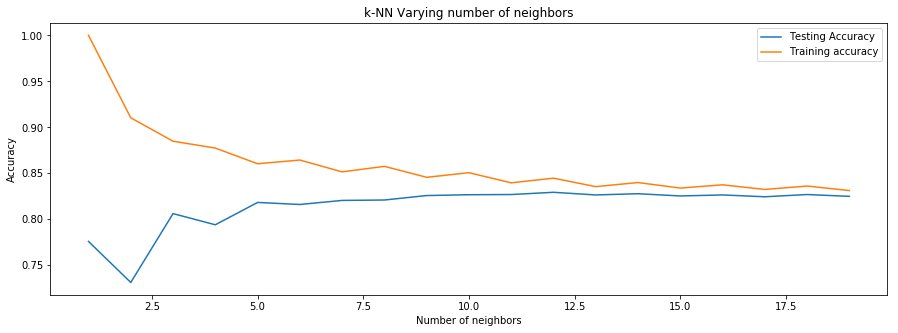

In [95]:
# Plotting different neighbours plot
plt.figure(figsize=(15,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- As the number of neighbours increases then the accuray is also increases.from 13 onwards it has similar accuracy for train and test. So finalizing neighbours to 13

In [100]:
# Implementing knn classifier with k=13 neighbors
knn = KNeighborsClassifier(n_neighbors=13)
#Fitting the model
knn.fit(X_train_knn,y_train_knn)
#Printing train and test accuracy
print('Train_Knn_Accuracy:',knn.score(X_train_knn,y_train_knn))
print('Test_Knn_Accuracy:',knn.score(X_test_knn,y_test_knn))

Train_Knn_Accuracy: 0.8354681978798587
Test_Knn_Accuracy: 0.8264517553543829


In [201]:
#Finding classification report for train data
from sklearn.metrics import classification_report
y_train_pred_acc=knn.predict(X_train_knn)
print(classification_report(y_train_knn, y_train_pred_acc))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45      3281
           1       1.00      0.45      0.62     14831

    accuracy                           0.55     18112
   macro avg       0.64      0.73      0.53     18112
weighted avg       0.87      0.55      0.59     18112



In [99]:
#Finding classification report for test data
from sklearn.metrics import classification_report
y_pred_acc=knn.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred_acc))

              precision    recall  f1-score   support

           0       0.65      0.09      0.15       820
           1       0.83      0.99      0.90      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.54      0.53      4529
weighted avg       0.80      0.83      0.77      4529



- **Implementing Random Over Sampling**

In [101]:
#Actual train data count
y_train_knn.value_counts()

1    14831
0     3281
Name: Recommended IND, dtype: int64

In [102]:
#Importing imbalance library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros_knn,y_train_ros_knn = ros.fit_resample(X_train_knn,y_train_knn)

In [103]:
y_train_ros_knn.value_counts()

1    14831
0    14831
Name: Recommended IND, dtype: int64

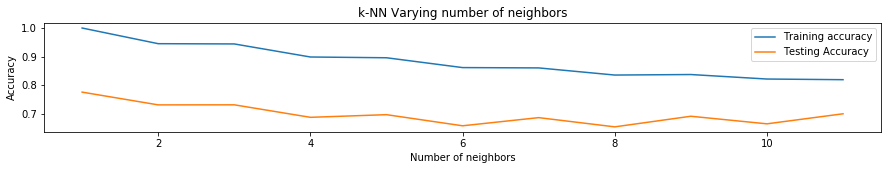

In [200]:
#Import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
train_accuracy_rov = np.empty(len(neighbors))
test_accuracy_rov = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn_ros = KNeighborsClassifier(n_neighbors=k)
    
    #Fitting the model
    knn_ros.fit(X_train_ros_knn, y_train_ros_knn)
    
    #Compute accuracy on the training set
    train_accuracy_rov[i] = knn_ros.score(X_train_ros_knn, y_train_ros_knn)
    
    #Compute accuracy on the test set
    test_accuracy_rov[i] = knn_ros.score(X_test_knn, y_test_knn)
#Generating plot
plt.figure(figsize=(15,2))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy_rov, label='Training accuracy')
plt.plot(neighbors, test_accuracy_rov, label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- From above graph, at 11 neighbours accuray is maximum

In [190]:
# Implementing knn with 11 neighbours using Oversampling
#Setting up a knn classifier with k neighbors
knn_ovr = KNeighborsClassifier(n_neighbors=11)
#Fitting the model
knn_ovr.fit(X_train_ros_knn, y_train_ros_knn)
#Getting accuracy
print('Train_Knn_Accuracy:',knn_ovr.score(X_train_ros_knn, y_train_ros_knn))
print('Test_Knn_Accuracy:',knn_ovr.score(X_test_knn,y_test_knn))

Train_Knn_Accuracy: 0.8193648439080304
Test_Knn_Accuracy: 0.7001545595054096


In [202]:
#Finding classification report for train data
from sklearn.metrics import classification_report
y_train_pred_ovs=knn_ovr.predict(X_train_knn)
print(classification_report(y_train_knn, y_train_pred_ovs))

              precision    recall  f1-score   support

           0       0.44      0.83      0.58      3281
           1       0.95      0.77      0.85     14831

    accuracy                           0.78     18112
   macro avg       0.70      0.80      0.72     18112
weighted avg       0.86      0.78      0.80     18112



In [191]:
#Finding classification report for test data
from sklearn.metrics import classification_report
y_pred_ovs=knn_ovr.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred_ovs))

              precision    recall  f1-score   support

           0       0.32      0.58      0.41       820
           1       0.89      0.73      0.80      3709

    accuracy                           0.70      4529
   macro avg       0.60      0.65      0.61      4529
weighted avg       0.78      0.70      0.73      4529



- **Implementing SMOTE**

In [116]:
# import library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_train_smote_knn,y_train_smote_knn = smote.fit_resample(X_train_knn,y_train_knn)

In [117]:
y_train_smote_knn.value_counts()

1    14831
0    14831
Name: Recommended IND, dtype: int64

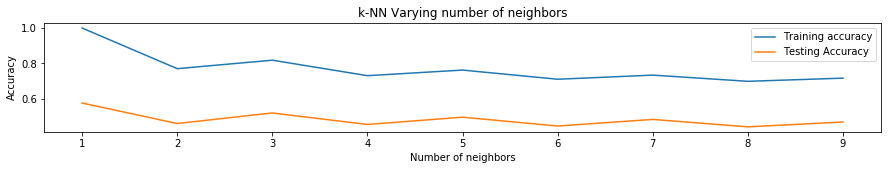

In [119]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setting up arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy_smote = np.empty(len(neighbors))
test_accuracy_smote = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setting up a knn classifier with k neighbors
    knn_sm = KNeighborsClassifier(n_neighbors=k)
    
    #Fitting the model
    knn_sm.fit(X_train_smote_knn, y_train_smote_knn)
    
    #Compute accuracy on the training set
    train_accuracy_smote[i] = knn_sm.score(X_train_smote_knn, y_train_smote_knn)
    
    #Compute accuracy on the test set
    test_accuracy_smote[i] = knn_sm.score(X_test_knn, y_test_knn)
#Generating plot
plt.figure(figsize=(15,2))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy_smote, label='Training accuracy')
plt.plot(neighbors, test_accuracy_smote, label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()   

In [139]:
# Implementing knn with 7 neighbours using Oversampling
#Setting up a knn classifier with k neighbors
knn_smote = KNeighborsClassifier(n_neighbors=3)
#Fitting the model
knn_smote.fit(X_train_smote_knn, y_train_smote_knn)
#Getting accuracy
print('Train_Knn_Accuracy:',knn_smote.score(X_train_smote_knn, y_train_smote_knn))
print('Test_Knn_Accuracy:',knn_smote.score(X_test_knn, y_test_knn))

Train_Knn_Accuracy: 0.8185894410356686
Test_Knn_Accuracy: 0.5210863325237359


In [203]:
#Finding classification report for train data
from sklearn.metrics import classification_report
y_train_pred_smote=knn_smote.predict(X_train_knn)
print(classification_report(y_train_knn, y_train_pred_smote))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55      3281
           1       1.00      0.64      0.78     14831

    accuracy                           0.70     18112
   macro avg       0.69      0.82      0.66     18112
weighted avg       0.89      0.70      0.74     18112



In [140]:
#Finding classification report for test data
from sklearn.metrics import classification_report
y_pred_smote=knn_smote.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred_smote))

              precision    recall  f1-score   support

           0       0.25      0.83      0.39       820
           1       0.92      0.45      0.61      3709

    accuracy                           0.52      4529
   macro avg       0.59      0.64      0.50      4529
weighted avg       0.80      0.52      0.57      4529



### Implementing ADASYN

In [141]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
# fitting predictor and target variable
X_train_ada_knn,y_train_ada_knn = ada.fit_resample(X_train_knn,y_train_knn)

In [125]:
y_train_knn.value_counts()

1    14831
0     3281
Name: Recommended IND, dtype: int64

In [124]:
y_train_ada_knn.value_counts()

0    15155
1    14831
Name: Recommended IND, dtype: int64

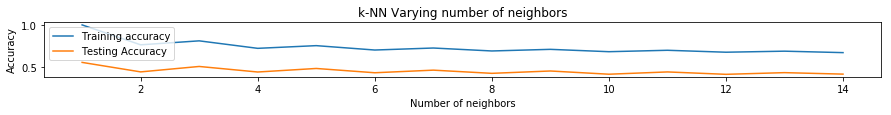

In [135]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy_ada = np.empty(len(neighbors))
test_accuracy_ada = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setting up a knn classifier with k neighbors
    knn_ada = KNeighborsClassifier(n_neighbors=k)
    
    #Fitting the model
    knn_ada.fit(X_train_ada_knn, y_train_ada_knn)
    
    #Compute accuracy on the training set
    train_accuracy_ada[i] = knn_ada.score(X_train_ada_knn, y_train_ada_knn)
    
    #Compute accuracy on the test set
    test_accuracy_ada[i] = knn_ada.score(X_test_knn, y_test_knn)
#Generating plot
plt.figure(figsize=(15,1))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy_ada, label='Training accuracy')
plt.plot(neighbors, test_accuracy_ada, label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()   

In [196]:
# Implementing knn with 3 neighbours using adasyn
#Setting up a knn classifier with k neighbors
knn_ada = KNeighborsClassifier(n_neighbors=3)
#Fitting the model
knn_ada.fit(X_train_ada_knn, y_train_ada_knn)
#Getting accuracy
print('Train_Knn_Accuracy:',knn_ada.score(X_train_ada_knn, y_train_ada_knn))
print('Test_Knn_Accuracy:',knn_ada.score(X_test_knn, y_test_knn))

Train_Knn_Accuracy: 0.8119789234976322
Test_Knn_Accuracy: 0.5153455508942372


In [204]:
#Finding classification report for train data
from sklearn.metrics import classification_report
y_train_pred_ada =knn_ada.predict(X_train_knn)
print(classification_report(y_train_knn, y_pred_ada))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54      3281
           1       1.00      0.62      0.77     14831

    accuracy                           0.69     18112
   macro avg       0.68      0.81      0.65     18112
weighted avg       0.89      0.69      0.72     18112



In [197]:
#Finding classification metrics for test data
from sklearn.metrics import classification_report
y_pred_ada =knn_ada.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred_ada))

              precision    recall  f1-score   support

           0       0.25      0.86      0.39       820
           1       0.94      0.44      0.60      3709

    accuracy                           0.52      4529
   macro avg       0.59      0.65      0.49      4529
weighted avg       0.81      0.52      0.56      4529



In [145]:
## Tokenizer to read all the words present in our corpus
token = Tokenizer()
token.fit_on_texts(text)

In [146]:
#Declaring the vocabulary size
vocab_size  = len(token.word_index) + 1
vocab_size

19230

In [147]:
#conversion of text to numerical format
encoded_text = token.texts_to_sequences(text)

In [148]:
#printing the values of encoded texts of top 3 rows
print(encoded_text[:3])

[[173, 429, 799, 553, 24], [2, 1, 1578, 47, 1196, 147, 56, 9, 226, 763, 329, 10, 16, 74, 763, 43, 27, 43, 372, 2, 35, 320, 17, 315, 10, 89, 73, 1278, 341, 647, 43], [126, 968, 1, 15, 120, 51, 1028, 16, 43, 13, 161, 3, 145, 6764, 13, 13, 538, 61, 667, 1772, 43, 46, 526, 172, 4, 562, 24, 5, 177, 105, 562, 86, 379, 420, 597, 393, 4532, 857, 1748, 1749, 80, 1472, 4532, 379, 726, 3124, 370, 828]]


In [149]:
#'max_length' = 120 means we are considering max 120 words or token only
#padding='post' means that we padding post the sentence(keeping values 0 if the tokens are not there)

max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [150]:
X

array([[  173,   429,   799, ...,     0,     0,     0],
       [    2,     1,  1578, ...,     0,     0,     0],
       [  126,   968,     1, ...,     0,     0,     0],
       ...,
       [    5,    22,     4, ...,     0,     0,     0],
       [   27,     1,   487, ...,     0,     0,     0],
       [    1,   119, 19229, ...,     0,     0,     0]])

In [151]:
#declaring dictionary to store all the words as keys in the dictionary and their vector representations as values

glove_vectors = dict()

file = open('glove.6B.100d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1: ])
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
file.close()

In [152]:
glove_vectors

{'the': array(['-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172',
        '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459',
        '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231',
        '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336',
        '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971',
        '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722',
        '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397',
        '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531',
        '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477',
        '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205',
        '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167',
        '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079',
        '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044',
        '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972',
        '0

In [153]:
#printing length of glove vectors
len(glove_vectors)

400000

In [154]:
keys = glove_vectors.keys()
len(keys)

400000

In [155]:
# Taking glove vector of 100 dimensions
word_vector_matrix = np.zeros((vocab_size, 100)) 

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        print(word)

xxs
pilcro
tshirt
seethrough
34d
vneck
xsmall
xsp
36d
wouldve
wellmade
0p
xxsp
36dd
34dd
springsummer
135lbs
32dd
fallwinter
werent
00p
itll
120lbs
30dd
130lbs
115lbs
theyd
125lbs
couldve
pxs
skinnies
highwaisted
140lbs
hadnt
armhole
shouldnt
shortwaisted
jsut
tshirts
34ddd
145lbs
offwhite
highlow
theyll
highquality
110lbs
cartonnier
pearshaped
buttondown
shouldve
offtheshoulder
383040
34f
midthigh
truetosize
36ddd
deletta
heathered
stevies
midrise
bralette
skort
youve
pilcros
yearround
128lbs
it39s
sacklike
smallmedium
theyve
lowcut
xspetite
dindt
2526
colorway
loosefitting
34d2735
150lbs
pxxs
longsleeved
332537
inperson
laceup
skinnys
34g
midweight
pearshape
seethru
jeggings
regualr
100lbs
shouldersback
antro
i39m
34aa
welldesigned
sweatercoat
blousey
wld
antho
slub
marled
elevenses
32ddd
flowey
123lbs
lxl
snugger
postbaby
120lb
springfall
poofed
155lbs
topthe
illfitting
2728
backordered
mediumlarge
130lb
camis
maternityish
fallspring
smallchested
racerback
moulinette
handwash
dresss

ponchosweater
blacki
momish
smallfits
thered
armsshouldersback
whitenavy
marroon
nonmaternity
30d32c
116lb
retailerpologist
bomberstyle
hipline
00p0p
softcomfortable
sweatertunic
daytoevening
greenyellow
cardigansweater
appleshaped
bronzey
lookbut
wearthe
topblouse
chestso
gianormous
downbut
weddingish
27r
lessthanperfect
36cd
hookandeye
greige
thatd
snugi
taylored
shld
fabricweight
poofiness
purpleish
boyshort
photobut
sheerest
topthis
pantsleggings
creamblue
bunchiness
lvoe
biggermuscular
pintuck
tennies
earthtone
bluepurplesilver
riverdeck
heihei
chunkiness
updress
apprx
feminineromantic
thoughthe
dorsay
topgot
flatttering
biggish
coralnavy
tealwhite
inseams
34a2836
whiteyellow
thsi
petties
boyleg
unco
terryclothlike
superskinny
pictureddescribed
skirtits
wornin
eberjey
wiast
aestheticdesign
132lbs
exmaple
patternprint
crosswrap
darkler
mathced
everythiing
msallet
jkeep
matvehd
ejans
compaint
ldecide
dressif
reveiwsi
periwinklecolored
grrrrrrrrrrr
layerng
goodhyouman
chubbiness
wasn

isalmsot
zipepr
richlooking
dryerdryer
lightwash
lineseparating
waistwere
23x
shyle
problemhips
featuresthe
gorgeousthis
bealthough
negativ
xsm
browngrayplum
thighsmidsection
amazingmuch
oneshoping
greyrustteal
realllllly
126lbs
bustyside
taupenavy
fiteverything
skinniesblack
bootees
thylo
ubercomfortable
hipthis
ribswaist
57125lbs
lycralove
perfectlyat
suitnot
boxyrun
4baby
figuredefining
36bc
michigans
littlegirls
overywhelming
incase
chamomix
themmake
hipsthe
iive
roomybaggy
ulitimately
pric
buttt
bottombackside
coveragealso
priceim
leggingsyoga
redmauve
ltitle
thougha
peite0
3quarter
fit54
piratelike
redand
chanceand
fabricso
coatjackets
untacked
fluffiest
collarcuffs
whitedirty
citymo
mediately
fittedtight
362940
sandkhaki
tbose
stylishlove
salesome
outhang
sloppylooking
ampampamp
viscosepolyester
whitetanblack
coored
grayblacktan
nonswing
petittes
picnicso
reoommend
bohemianrocker
3the
57similar
dressshirt
lovethis
toolike
weirdwonky
vneckits
almostlingerielike
drycleaned
fabricm

navycream
thoughalmost
gotothebeach
unrepairable
itwhich
bedtimepretty
thin98
delicateness
purcahsed
10which
itits
allyear
hippelvis
pregant
unfortunetly
prefall
depictes
stiffitchy
outmellows
stretchyi
washprint
shouldersthe
purchaseit
unsee
sizingwise
swingdress
expectedand
shouldersbackupper
coolfeeling
jeansnecklaces
sizestyle
bluishgrayish
saleruns
prominentand
dioes
180lbs
detailcut
maternityand
swingflow
doubleknot
embrodering
flatteringespecially
everythingeven
quibb
syllish
twotoned
blouseespecially
shellin
preholiday
3234ddd
somethig
broen
colde
jacketis
everfrom
topso
lineny
brunchbeach
versatilecan
awesomefrom
likepilled
itemprobably
seampleat
heavychunky
sweaterthink
55yearold
drappiness
halfwayso
poundsluckily
forsomething
shirtssweaters
thoughtwhat
hipsit
constructedi
tooim
taupetotally
coralred
nubbly
drapeyness
agai
jewelryhandbags
ironingsteaming
salestill
summeri
dinnerparty
ropethread
sympath
catchc
mehand
the10
openlow
purpley
weightcan
reallybut
nicecan
tooutility

polyspandexrayon
fiattering
colw
tummmy
purchae
braand
facejust
34ausually
brests
stitchedin
richerdarker
dressiness
uniqueattractive
largestretch
tassle
estatic
rainumbrella
umbrellarain
henleybutton
oversizedtunic
substan
rusticcharming
3732ddd
horizont
deeperricher
362735
websiteif
backso
upsid
6this
daysstill
alteredbut
sundrys
27in
fabricnoticed
sizeruns
wellid
120123lbs
hookeye
yesyou
32b2636
tissuestyle
retailerpligie
moderncitymeetsprairieboho
rsty
shawljacket
blackbrown
shillouette
courderoy
104lbs
halfwaytochristmas
truetolife
20lb
butwhat
midbottom
insetso
nonflat
westher
slendertaller
boughtthe
nicksbohemian
notedits
underpattern
wonce
iteveryone
flatteri
leggingsperfect
nottight
pokerstraight
mulitcolored
4inches
adoreable
neckband
casualed
bizarreit
alined
delicatemay
brasports
hugevery
dansko
amost
rediculous
alrea
occas
mermaidish
fanicer
hipbones
chestnot
workallows
thesecant
easyslouchy
peplu
xxxxxxxxs
finei
ivoryespecially
iether
cardigansweaterjacket
taupecolored
th

winterhopefully
creamoff
pricejust
asymetrical
6i
dresstop
superpetite
fullbaggy
modellose
texturebut
sonot
vribant
pillingpulls
810p
comfortableits
9inches
widerib
allways
dissapointment
strech
27tall
26tall
fitquality
undnerneath
debatedtwo
durablethey
decid
13540
instea
picro
anymoreso
boyfriendy
ideasoft
colorwhich
chinosyou
blazeradorable
washedfaded
vibranti
anafa
stainstick
themso
greathowever
lbds
airism
chinosthey
unproportioned
baggyall
shapedid
superfitted
legsbut
colsely
mentione
frontsleeves
stre
qualityverses
longeven
flightthey
rolldown
topwith
10the
gabardia
lacausa
derriã©re
patternsfabrics
pantscapris
manthis
sexyconservative
30aa
necklineshoulder
quasiboatneck
32c2633
312434and
shopperi
retailerpolgies
longerim
singleuse
knitthe
3inches
crimsoncolored
scarfeven
58slender
leggingboot
scarvesspot
lbnow
wiryeven
excellentvery
soucotache
londonbased
goldish
xxxxxs
3xxxl
cordspants
bellflare
26527
washa
wellso
anlobn
chambraywith
dressmore
pixlove
sleevesits
kneequality
s

coutour
wrardrobe
effortlessnesswith
topsalso
opencloseotherwise
uhmazing
toptunic
tshirti
ribcageshort
bity
sorbetinspired
halfline
halflining
bejewels
boyfriendgirlfriend
orginially
palced
appropirate
opinion0
dreses
neitral
tulipdesign
navynot
slightand
slightdisappointment
cuteasallgetout
samecolor
topsit
designcut
typemeasurements
emeraldgreen
farskinned
illplaced
28dd
petiite
referencei
halterneck
5398
colorsbeautiful
glovegood
storealong
desirethe
alinefitnflare
abck
feltlike
notso
pouff
xl14
slimfitting
stinning
zipperone
neverth
photoyou
detailrich
dressthere
sunnyhappy
wiskering
shouldersits
tanbeige
overalli
satisfi
whitebeige
idid
fitshape
microrib
brigh
sizebut
gladthat
postthree
navyish
anothe
tunicruffle
anywherethis
prettyits
downthis
enoughit
mehkind
herefit
earrin
openfront
mintteal
greydark
errandsinstead
typi
5534c
notsoprecious
leatherthick
hipless
comjfortable
overexaggerated
peachapricot
longerlarger
higheri
snatc
welleven
eitherhow
coverageprotection
arrivedlove

In [156]:
word_vector_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [157]:
#splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)


In [158]:
np.shape(X)

(22641, 120)

In [206]:
#Building CNN model
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))

model.add(Conv1D(64, 8, activation = 'relu'))#Where 64 is number of filters and 8 is size of filters
model.add(MaxPooling1D(2)) #Reducing the output to half using using pooling layer
model.add(Dropout(0.5)) #Implementing 50% of dropout

model.add(Dense(32, activation='relu'))#Hidden layer with 32 neurons
model.add(Dropout(0.5)) #Implementing 50% of dropout

model.add(Dense(16, activation='relu'))#Hidden layer with 16 neurons

model.add(GlobalMaxPooling1D())#final pooling layer

model.add(Dense(1, activation='sigmoid'))#Output layer with binary output

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc',f1_m, precision_m, recall_m])

model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))#Fitting model with 10 epochs

Train on 18112 samples, validate on 4529 samples
Epoch 1/10
18112/18112 [==============================] - 82s 5ms/step - loss: 0.4399 - acc: 0.8176 - f1_m: 0.8968 - precision_m: 0.8269 - recall_m: 0.9836 - val_loss: 0.4485 - val_acc: 0.8331 - val_f1_m: 0.9048 - val_precision_m: 0.8388 - val_recall_m: 0.9856
Epoch 2/10
18112/18112 [==============================] - 33s 2ms/step - loss: 0.3754 - acc: 0.8391 - f1_m: 0.9061 - precision_m: 0.8573 - recall_m: 0.9651 - val_loss: 0.4577 - val_acc: 0.8485 - val_f1_m: 0.9099 - val_precision_m: 0.8746 - val_recall_m: 0.9514
Epoch 3/10
18112/18112 [==============================] - 35s 2ms/step - loss: 0.3442 - acc: 0.8529 - f1_m: 0.9129 - precision_m: 0.8725 - recall_m: 0.9607 - val_loss: 0.4049 - val_acc: 0.8501 - val_f1_m: 0.9112 - val_precision_m: 0.8725 - val_recall_m: 0.9567
Epoch 4/10
18112/18112 [==============================] - 34s 2ms/step - loss: 0.3292 - acc: 0.8587 - f1_m: 0.9160 - precision_m: 0.8807 - recall_m: 0.9571 - val_loss: 

In [207]:
#Finding classification metrics for train data on CNN
from sklearn.metrics import classification_report
y_train_pred_acc_cnn=model.predict_classes(X_train)
print(classification_report(y_train, y_train_pred_acc_cnn))


              precision    recall  f1-score   support

           0       0.90      0.48      0.63      3281
           1       0.90      0.99      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.90      0.74      0.78     18112
weighted avg       0.90      0.90      0.88     18112



In [166]:
#Finding classification metrics for test data on CNN
from sklearn.metrics import classification_report
y_pred_acc_cnn=model.predict_classes(X_test)
print(classification_report(y_test, y_pred_acc_cnn))


              precision    recall  f1-score   support

           0       0.44      0.66      0.53       835
           1       0.92      0.82      0.87      3863

    accuracy                           0.79      4698
   macro avg       0.68      0.74      0.70      4698
weighted avg       0.83      0.79      0.81      4698



In [146]:
y_train.value_counts()

1    15451
0     3337
Name: Recommended IND, dtype: int64

In [148]:
y_test.value_counts()

1    3863
0     835
Name: Recommended IND, dtype: int64

- ### Implementing Random Over Sampling for CNN

In [160]:
from imblearn.over_sampling import RandomOverSampler
#Delaring random over sampling object
cnn_ros = RandomOverSampler(random_state=42)
X_train_ros_cnn,y_train_ros_cnn = cnn_ros.fit_resample(X_train, y_train)

In [159]:
y_train.value_counts()

1    14831
0     3281
Name: Recommended IND, dtype: int64

In [161]:
y_train_ros_cnn.value_counts()

1    14831
0    14831
Name: Recommended IND, dtype: int64

In [163]:
vec_size = 100

model_ovr = Sequential()
model_ovr.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))

model_ovr.add(Conv1D(64, 8, activation = 'relu'))#where 64 is number of filters and 8 is size of filters
model_ovr.add(MaxPooling1D(2))#Reducing the output to half using using pooling layer
model_ovr.add(Dropout(0.5))#Implementing 50% of dropout

model_ovr.add(Dense(32, activation='relu'))#Hidden layer with 32 neurons
model_ovr.add(Dropout(0.5))#Implementing 50% of dropout

model_ovr.add(Dense(16, activation='relu'))#Hidden layer with 16 neurons

model_ovr.add(GlobalMaxPooling1D())#final pooling layer

model_ovr.add(Dense(1, activation='sigmoid'))#Output layer with binary output

model_ovr.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc',f1_m, precision_m, recall_m])

model_ovr.fit(X_train_ros_cnn, y_train_ros_cnn, epochs = 10, validation_data = (X_test, y_test))#Fitting model with 10 epochs

Train on 29662 samples, validate on 4529 samples
Epoch 1/10
29662/29662 [==============================] - 50s 2ms/step - loss: 0.5688 - acc: 0.6974 - f1_m: 0.6865 - precision_m: 0.7016 - recall_m: 0.6953 - val_loss: 0.5103 - val_acc: 0.7973 - val_f1_m: 0.8651 - val_precision_m: 0.9315 - val_recall_m: 0.8114
Epoch 2/10
29662/29662 [==============================] - 29s 975us/step - loss: 0.4562 - acc: 0.7848 - f1_m: 0.7790 - precision_m: 0.7916 - recall_m: 0.7835 - val_loss: 0.4946 - val_acc: 0.8026 - val_f1_m: 0.8686 - val_precision_m: 0.9340 - val_recall_m: 0.815314 - recall
Epoch 3/10
29662/29662 [==============================] - 32s 1ms/step - loss: 0.4055 - acc: 0.8201 - f1_m: 0.8131 - precision_m: 0.8295 - recall_m: 0.8105 - val_loss: 0.4980 - val_acc: 0.7980 - val_f1_m: 0.8641 - val_precision_m: 0.9432 - val_recall_m: 0.8005
Epoch 4/10
29662/29662 [==============================] - 35s 1ms/step - loss: 0.3634 - acc: 0.8424 - f1_m: 0.8363 - precision_m: 0.8526 - recall_m: 0.8321

In [209]:
#Finding classification metrics for train data on CNN
from sklearn.metrics import classification_report
y_train_pred_ovr_cnn=model_ovr.predict_classes(X_train)
print(classification_report(y_train, y_train_pred_ovr_cnn))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3281
           1       0.99      0.97      0.98     14831

    accuracy                           0.97     18112
   macro avg       0.93      0.97      0.95     18112
weighted avg       0.97      0.97      0.97     18112



In [164]:
#Finding classification metrics for test data on CNN
from sklearn.metrics import classification_report
y_pred_ovr_cnn = model_ovr.predict_classes(X_test)
print(classification_report(y_test, y_pred_ovr_cnn))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       820
           1       0.91      0.92      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.76      0.76      4529
weighted avg       0.86      0.86      0.86      4529



- ### Implementing SMOTE for CNN

In [165]:

# import library
from imblearn.over_sampling import SMOTE
cnn_smote = SMOTE()

# fit predictor and target variable
X_train_smote_cnn,y_train_smote_cnn = cnn_smote.fit_resample(X_train,y_train)

In [166]:
y_train.value_counts()

1    14831
0     3281
Name: Recommended IND, dtype: int64

In [167]:
y_train_smote_cnn.value_counts()

1    14831
0    14831
Name: Recommended IND, dtype: int64

In [168]:
vec_size = 100

model_smote = Sequential()
model_smote.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))

model_smote.add(Conv1D(64, 8, activation = 'relu'))#where 64 is number of filters and 8 is size of filters
model_smote.add(MaxPooling1D(2))#Reducing the output to half using using pooling layer
model_smote.add(Dropout(0.5))#Implementing 50% of dropout

model_smote.add(Dense(32, activation='relu'))#Hidden layer with 32 neurons
model_smote.add(Dropout(0.5))#Implementing 50% of dropout

model_smote.add(Dense(16, activation='relu'))#Hidden layer with 16 neurons

model_smote.add(GlobalMaxPooling1D())#final pooling layer

model_smote.add(Dense(1, activation='sigmoid'))#Output layer with binary output

model_smote.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc',f1_m, precision_m, recall_m])

model_smote.fit(X_train_smote_cnn, y_train_smote_cnn, epochs = 10, validation_data = (X_test, y_test))

Train on 29662 samples, validate on 4529 samples
Epoch 1/10
29662/29662 [==============================] - 51s 2ms/step - loss: 0.6558 - acc: 0.6065 - f1_m: 0.5844 - precision_m: 0.6190 - recall_m: 0.5839 - val_loss: 0.5550 - val_acc: 0.7746 - val_f1_m: 0.8567 - val_precision_m: 0.8783 - val_recall_m: 0.8403
Epoch 2/10
29662/29662 [==============================] - 29s 982us/step - loss: 0.5433 - acc: 0.7277 - f1_m: 0.7158 - precision_m: 0.7406 - recall_m: 0.7121 - val_loss: 0.5046 - val_acc: 0.7896 - val_f1_m: 0.8680 - val_precision_m: 0.8797 - val_recall_m: 0.8610
Epoch 3/10
29662/29662 [==============================] - 29s 986us/step - loss: 0.4783 - acc: 0.7765 - f1_m: 0.7691 - precision_m: 0.7813 - recall_m: 0.7728 - val_loss: 0.4847 - val_acc: 0.7986 - val_f1_m: 0.8727 - val_precision_m: 0.8910 - val_recall_m: 0.8595
Epoch 4/10
29662/29662 [==============================] - 30s 1ms/step - loss: 0.4410 - acc: 0.7970 - f1_m: 0.7910 - precision_m: 0.8049 - recall_m: 0.7920 - val_lo

In [210]:
#Finding classification metrics for train data on CNN
from sklearn.metrics import classification_report
y_train_pred_smote_cnn = model_smote.predict_classes(X_train)
print(classification_report(y_train, y_train_pred_smote_cnn))

              precision    recall  f1-score   support

           0       0.60      0.77      0.68      3281
           1       0.95      0.89      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.83      0.80     18112
weighted avg       0.88      0.87      0.87     18112



In [169]:
#Finding classification metrics for test data on CNN
from sklearn.metrics import classification_report
y_pred_smote_cnn = model_smote.predict_classes(X_test)
print(classification_report(y_test, y_pred_smote_cnn))

              precision    recall  f1-score   support

           0       0.45      0.64      0.53       820
           1       0.91      0.83      0.87      3709

    accuracy                           0.79      4529
   macro avg       0.68      0.73      0.70      4529
weighted avg       0.83      0.79      0.81      4529



### Implementing ADASYN with CNN

In [170]:
# Applying adasyn technique to balance the classes
from imblearn.over_sampling import ADASYN
#declaring adasyn object
cnn_adasyn = ADASYN(random_state=12)
X_train_adasyn_cnn, y_train_adasyn_cnn = cnn_adasyn.fit_sample(X_train, y_train)

In [171]:
y_train.value_counts()

1    14831
0     3281
Name: Recommended IND, dtype: int64

In [172]:
y_train_adasyn_cnn.value_counts()

1    14831
0    14156
Name: Recommended IND, dtype: int64

In [173]:
vec_size = 100

model_adasyn = Sequential()
model_adasyn.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))

model_adasyn.add(Conv1D(64, 8, activation = 'relu'))#where 64 is number of filters and 8 is size of filters
model_adasyn.add(MaxPooling1D(2))#Reducing the output to half using using pooling layer
model_adasyn.add(Dropout(0.5))#Implementing 50% of dropout

model_adasyn.add(Dense(32, activation='relu'))#Hidden layer with 32 neurons
model_adasyn.add(Dropout(0.5))#Implementing 50% of dropout

model_adasyn.add(Dense(16, activation='relu'))#Hidden layer with 16 neurons

model_adasyn.add(GlobalMaxPooling1D())#final pooling layer

model_adasyn.add(Dense(1, activation='sigmoid'))#Output layer with binary output

model_adasyn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc',f1_m, precision_m, recall_m])

model_adasyn.fit(X_train_adasyn_cnn, y_train_adasyn_cnn, epochs = 10, validation_data = (X_test, y_test))

Train on 28987 samples, validate on 4529 samples
Epoch 1/10
28987/28987 [==============================] - 63s 2ms/step - loss: 0.6432 - acc: 0.6179 - f1_m: 0.6160 - precision_m: 0.6358 - recall_m: 0.6292 - val_loss: 0.6699 - val_acc: 0.5584 - val_f1_m: 0.6450 - val_precision_m: 0.9187 - val_recall_m: 0.5040
Epoch 2/10
28987/28987 [==============================] - 38s 1ms/step - loss: 0.5243 - acc: 0.7440 - f1_m: 0.7370 - precision_m: 0.7650 - recall_m: 0.7316 - val_loss: 0.5573 - val_acc: 0.7262 - val_f1_m: 0.8136 - val_precision_m: 0.9013 - val_recall_m: 0.7464
Epoch 3/10
28987/28987 [==============================] - 38s 1ms/step - loss: 0.4654 - acc: 0.7834 - f1_m: 0.7803 - precision_m: 0.7965 - recall_m: 0.7807 - val_loss: 0.6283 - val_acc: 0.6304 - val_f1_m: 0.7193 - val_precision_m: 0.9342 - val_recall_m: 0.5904
Epoch 4/10
28987/28987 [==============================] - 38s 1ms/step - loss: 0.4243 - acc: 0.8065 - f1_m: 0.8042 - precision_m: 0.8175 - recall_m: 0.8042 - val_loss: 

In [211]:
#Finding classification metrics for train data on CNN
from sklearn.metrics import classification_report
y_train_pred_adasyn_cnn=model_adasyn.predict_classes(X_train)
print(classification_report(y_train, y_train_pred_adasyn_cnn))


              precision    recall  f1-score   support

           0       0.48      0.89      0.62      3281
           1       0.97      0.79      0.87     14831

    accuracy                           0.81     18112
   macro avg       0.73      0.84      0.75     18112
weighted avg       0.88      0.81      0.83     18112



In [174]:
#Finding classification metrics for test data on CNN
from sklearn.metrics import classification_report
y_pred_adasyn_cnn=model_adasyn.predict_classes(X_test)
print(classification_report(y_test, y_pred_adasyn_cnn))


              precision    recall  f1-score   support

           0       0.36      0.75      0.49       820
           1       0.93      0.71      0.80      3709

    accuracy                           0.72      4529
   macro avg       0.65      0.73      0.65      4529
weighted avg       0.83      0.72      0.75      4529

